In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [2]:
X = np.concatenate((np.ones((1, X.shape[1])), X), axis=0)
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

In [5]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta *(yi - zi)*xi
            count += 1
            if count % check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = 0.05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_regression(X, y, w_init, eta)
print(w[-1])

[[-4.08184088]
 [ 1.59770837]]


In [6]:
eta = 0.05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_regression(X, y, w_init, eta)
print(w[-1])

[[-4.10770097]
 [ 1.55781793]]


In [7]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03459655 0.05024288 0.07243434 0.10336073 0.14542124 0.20076506
  0.20076506 0.27050437 0.35374665 0.44691182 0.54396078 0.63778258
  0.7221612  0.79325553 0.89317311 0.92504991 0.94796888 0.96415107
  0.97543087 0.98857316]]


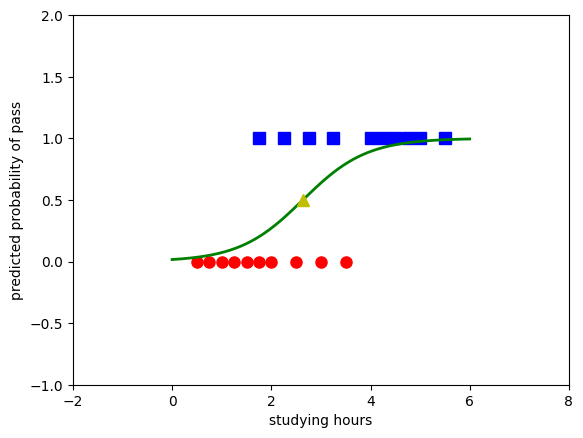

In [8]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()